## Modelo de epidemiologia para disseminação do COVID-19
### Autor de Referência: Dr. Wladimir Lyra, Universidade Estadual do Novo México

## Referências: 

https://github.com/CSSEGISandData/

### [Modelo matemático para simular a transmissibilidade baseada em fases de um novo coronavírus ](https://idpjournal.biomedcentral.com/articles/10.1186/s40249-020-00640-3)

### [Modelando a epidemia de coronavírus em uma cidade com Python ](https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2)





Neste código, foi utilizado um modelo SIR (suscetível-infectado-removido). Os vestígios modelar a evolução de uma população susceptível  $S$, infectado  $I$, e população removida, $R$. As equações são 


\begin{eqnarray}
\frac{dS}{dt} &=&-\beta I S \\
\frac{dI}{dt} &=& \beta I S - \gamma I\\
\frac{dR}{dt} &=&\gamma I
\end{eqnarray}


$\beta$ é a taxa de infecção e a $\gamma$ a taxa de recuperação. 

O contato com pessoas infectadas remove uma fração da população suscetível na taxa $\beta I S $, olocando-a na população infectada. Ao mesmo tempo, a população infectada tem uma taxa de recuperação $\gamma$. Um número $\gamma I$ é removido do infectado e colocado na população removida. 


### O parâmetror $R_0$

Podemos entender a dinâmica da população infectada escrevendo sua equação como

\begin{equation}
\frac{dI}{dt} = \gamma I \left(\frac{\beta}{\gamma} S - 1 \right),
\end{equation}

e notando que no início da infecção  $S \approx  1$ , quando (as populações são normalizadas por $N=S+I+R$ onde $N$ é o tamanho da população), reduz-se a

\begin{equation}
\frac{dI}{dt} \approx \gamma I \left(\frac{\beta}{\gamma}  - 1 \right).
\end{equation}

A dinâmica da população infectada é controlada pelo parâmetro

\begin{equation}
R_0 = \frac{\beta}{\gamma}
\end{equation}

Quando $R_0 > 1$ a população infectada cresce exponencialmente. Quando $R_0 \leq 1$ a doença é controlada.  

$R_0$ pode ser considerado o número médio de pessoas que uma pessoa infectada contaminará antes de ser removida. Como tal, é chamado o número de reprodução básico. O distanciamento social tem o efeito de diminuir a taxa de infecção $\beta$e, portanto, o número básico de reprodução $R_0$. 

### Tempo de duplicação e aplicação às atuais epidemias de COVID-19

Tendo por base 

\begin{equation}
\frac{dI}{dt} \approx \gamma I \left(R_0  - 1 \right)
\end{equation}

Nós podemos referenciar que o tempo de dobra da infecção $R_0$. O tempo de dobragem-e é 

\begin{equation}
t_e = \frac{1}{\gamma \left(R_0-1\right)}
\end{equation}

Logo o tempo de dúvida é

\begin{equation}
t_{\rm double} = t_e \ \ln 2 = \frac{\ln 2}{\gamma \left(R_0-1\right)}
\end{equation}

Dados da China e da Coréia do Sul sugerem que a taxa de recuperação é $\gamma=0.06$. Como tal, o tempo de duplicação e  $R_0$ são relacionados pelo gráfico abaixo. Também são mostradas as taxas de duplicação da China, Coréia do Sul, Itália e EUA, em 14 de março de 2020.

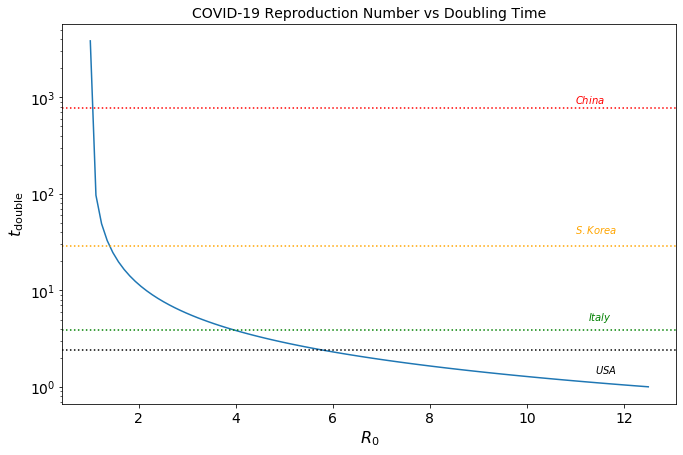

In [2]:
import numpy as np
import pylab as plt
import sys 

#
# R0 vs doubling time 
#

gamma = 0.06
mu = 0.01 
R0=np.linspace(1.003,12.5,100)
doubling_time = np.log(2.)/(gamma*(R0-1))
plt.figure(figsize=(11,7))

plt.plot(R0,doubling_time)

#
# Doubling time estimates as of March 14th.
#

plt.axhline(2.4,linestyle=':',color='black')
plt.axhline(3.9,linestyle=':',color='green')
plt.axhline(29,linestyle=':',color='orange')
plt.axhline(770,linestyle=':',color='red')

plt.annotate('$USA$'     ,xy=(11.4,2.4-1),color='black')
plt.annotate('$Italy$'   ,xy=(11.25,3.9+1),color='green')
plt.annotate('$S. Korea$',xy=(11.0,29+10) ,color='orange')
plt.annotate('$China$'   ,xy=(11.0,770+100),color='red')

plt.title("COVID-19 Reproduction Number vs Doubling Time")
plt.ylabel("$t_{\mathrm{double}}$")
plt.xlabel("$R_0$")
plt.yscale('log')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE) # controls default text sizes                   
plt.rc('axes', titlesize=MEDIUM_SIZE) # fontsize of the axes title               
plt.rc('axes', labelsize=BIGGER_SIZE) # fontsize of the x and y labels           
plt.rc('xtick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels             
plt.rc('ytick', labelsize=MEDIUM_SIZE) # fontsize of the tick labels             
plt.rc('legend', fontsize=MEDIUM_SIZE) # legend fontsize                         
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title         

plt.show()
#plt.savefig("R0DT_"+np.str(datetime.datetime.today())+".pdf")


In [3]:
def date_to_time(d):
    from datetime import datetime    

    n=len(d)    
    
    date=np.zeros(n)
    for i in range(n):
        date_object = datetime.strptime(d[i], '%m/%d/%y')
        date[i] = datetime.fromisoformat(np.str(date_object)).timestamp()
                  
    return (date-date[n-1])/86400.                
    
    
def calc_doubling_data(time,cases):
    
    tmp = np.gradient(np.log(1.0*cases+1e-10),time) 
    # get the average slope of the past week
    n = len(time)
    ksi = np.mean(tmp[n-8:n-1])
    doubling_time = np.log(2.)/ksi
    
    return doubling_time

def read_jhu_data(country,mode):
    import csv
    #base='./jhu/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-'
    base='./dat/time_series_19-covid-' 
    
    with open(base+mode+'.csv', newline='') as csvfile:
        datareader = csv.reader(csvfile)#, delimiter=',', quotechar='|')
        data = {} 
        for row in datareader:
            if (row[0] == 'Province/State'):
                n=len(row)
                dates = row[4:n]
                for i in range(len(dates)):
                    data[dates[i]]=0
            else:
                if (row[1]==country):
                    for i in range(len(dates)):
                        data[dates[i]] += np.int(row[i+4])
    
    return data,dates                
             
def get_data_country(name):

    dict_confirmed,dates = read_jhu_data(name,'Confirmed')
    dict_recovered,dates = read_jhu_data(name,'Recovered')
    dict_deaths,dates    = read_jhu_data(name,'Deaths')
    
    n1=len(dict_confirmed.keys())
    n2=len(dict_recovered.keys())
    if (n1!=n2):
        sys.exit()
    n3=len(dict_deaths.keys())    
    if (n2!=n3):
        sys.exit()
    
    #dates = dict_confirmed.keys()
    confirmed=np.zeros(len(dates))
    recovered=np.zeros(len(dates))
    deaths   =np.zeros(len(dates))
    for i in range(len(dates)):
        confirmed[i] = dict_confirmed[dates[i]]
        recovered[i] = dict_recovered[dates[i]]
        deaths[i]    = dict_deaths[dates[i]]


    country = dict([
                    ('name',name),
                    ('dates', dates),
                    ('confirmed', confirmed),
                    ('recovered', recovered),
                    ('deaths', deaths),
                   ])        
        
    return country

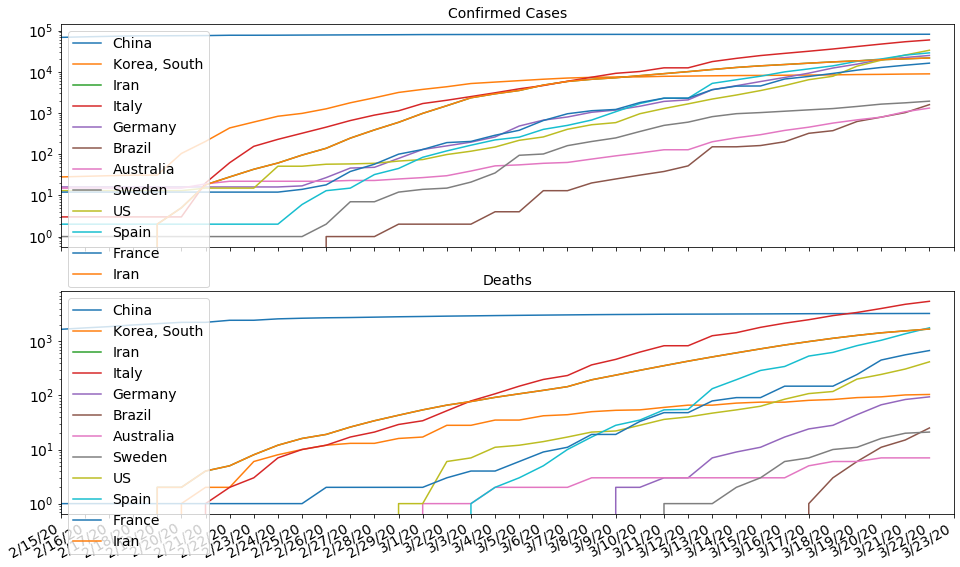

In [5]:
import matplotlib.dates as mdates

fig, (ax1,ax2) = plt.subplots(2,1,figsize=[16,10])

f = get_data_country('China')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Korea, South')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Iran')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Italy')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Germany')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Brazil')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Australia')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Sweden')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('US')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Spain')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('France')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

f = get_data_country('Iran')
ax1.plot(f['dates'],f['confirmed'],label=f['name'])
ax2.plot(f['dates'],f['deaths'],label=f['name'])

ax1.fmt_xdata = mdates.DateFormatter('%m/%d/%y')
ax2.fmt_xdata = mdates.DateFormatter('%m/%d/%y')

ax1.set_yscale("log")
ax2.set_yscale("log")

ax1.legend()
ax2.legend()

ax1.set_title('Confirmed Cases')
ax2.set_title('Deaths')

ax1.set_xlim(["2/15/20","3/23/20"])
ax2.set_xlim(["2/15/20","3/23/20"])

fig.autofmt_xdate()

plt.show()

### Taxa de mortalidade 

O último parâmetro no modelo é a taxa de mortalidade. Os removidos são recuperados / curados (C) ou mortos (D), de acordo com

\begin{eqnarray}
C &=& (1-\mu) R \\
D &=& \mu R 
\end{eqnarray}

Onde $\mu$ é a taxa de mortalidade. Os curados supostamente ganharam imunidade e não foram adicionados novamente à população suscetível. O conhecimento atual da epidemia parece implicar $\mu$=0.01. 

### Modelo aplicado às epidemias atuais 

Dado um universal $\gamma=0.06$, a entrada do modelo são os tempos de duplicação $t_{\rm double}$ e o número inicial de infectados   $I_0$. Abaixo estão os números de 14 de março para a Itália, Coréia do Sul, China e EUA. A população total é apenas para fins de normalização. O modelo assume N = 1 e trabalha com frações populacionais.

In [6]:
def select_country(name):
    
    dict_confirmed,dates = read_jhu_data(name,'Confirmed')
    dict_recovered,dates = read_jhu_data(name,'Recovered')
    dict_deaths,dates    = read_jhu_data(name,'Deaths')
    
    n1=len(dict_confirmed.keys())
    n2=len(dict_recovered.keys())
    if (n1!=n2):
        sys.exit()
    n3=len(dict_deaths.keys())    
    if (n2!=n3):
        sys.exit()
    
    #dates = dict_confirmed.keys()
    confirmed=np.zeros(len(dates))
    recovered=np.zeros(len(dates))
    deaths   =np.zeros(len(dates))
    for i in range(len(dates)):
        confirmed[i] = dict_confirmed[dates[i]]
        recovered[i] = dict_recovered[dates[i]]
        deaths[i]    = dict_deaths[dates[i]]
        
    if (name == 'Italy'):
        N=6e7  
        name_pt = 'It'+r'${\rm \'a}$'+'lia'
    elif (name== "Korea, South"):
        N=5.1e7
        name_pt = 'Cor'+r'${\rm \'e}$'+'ia do Sul'
    elif (name=="China"):
        N=1.4e9
        name_pt = 'China'
    elif (name=="US"):
        N=3.2e8
        name_pt = 'EUA'
    elif (name=="Sweden"):
        N=1e7
        name_pt = 'Su'+r'${\rm \'e}$'+'cia'
    elif (name=="Brazil"):
        N=2.09e8
        name_pt = 'Brasil'
    elif (name=="Germany"):
        N=8.3e7
        name_pt = 'Alemanha'
    elif (name=='Spain'):
        N=4.666e7
        name_pt = 'Espanha'
    elif (name=='Iran'):
        N=8.1e7
        name_pt = 'Ir'+r'$\rm {\c \~{a}}$'
    else:
        print("choose a valid country")
        sys.exit()
           
    cumI0 = confirmed[len(confirmed)-1]
    Rec0  = recovered[len(recovered)-1]
    D0    = deaths   [len(deaths)-1]
    I0    = cumI0-Rec0-D0    
    days_past=date_to_time(dates)    
    doubling_time=calc_doubling_data(days_past,confirmed)    
    beta = gamma + np.log(2.)/doubling_time 
    R0 = beta/gamma

    country = dict([
                    ('name', name),
                    ('name_pt', name_pt),
                    ('beta', beta),
                    ('gamma', gamma),
                    ('I0',I0),
                    ('Rec0',Rec0),
                    ('D0',D0),
                    ('N',N),
                    ('R0',R0),
                    ('days past',days_past),
                    ('cases',confirmed),
                    ('doubling time',doubling_time),
                    ('deaths',deaths),
                   ])

    print("Parameters for:",country['name'])
    print(f'Basic reproduction number R0 = {R0:.1f}')
    print("Doubling time =",doubling_time," days")
    print(f'Infection rate beta = {beta:.2f}')
    print('Current cummulative infections=',I0)
    
    return country

In [7]:
def appendvalues(S,I,R,t,SS,II,RR,tt):
    SS.append(S)
    II.append(I)
    RR.append(R)
    tt.append(t)
    return SS,II,RR,tt

def RK3(f):
    beta  = f['beta']
    gamma = f['gamma']
    I0    = f['I0']
    Rec0  = f['Rec0']
    D0    = f['D0']
    R0    = f['R0']
    N     = f['N']
    dbt   = f['doubling time']
    
    alpha_ts   = np.double([0.   , -5./9.  ,-153./128.])
    beta_ts    = np.double([1./3., 15./16. ,   8./15. ])
    Cdt = 0.5
#
#  Timestep defined by the timescale given by the rate of infection 
#
    tau_beta  = 1./beta 
    dt = Cdt*tau_beta
#    
# End of epidemics. 100 days if the doubling time is less than 10 days, 
# and 540 days (18 months) otherwise, which is the time estimated to
# develop a vaccine. 
#
    if (dbt < 10.):
        tmax = 100.
    else:
        tmax = 540.
#
# Lists to store the populations 
#
    SS=[]  # susceptible
    II=[]  # infected
    RR=[]  # removed
    DD=[]  # dead
    tt=[]  # time

#
# Initial values. 
#
    I=I0/N
    R=(Rec0+D0)/N
    S=1-I-R
#
#  To start the calculations
#
    dSdt = -beta*I*S
    dIdt =  beta*I*S - gamma*I
    dRdt =             gamma*I

#  Start the integration
    itmax=100000    
    t=0.
    ds=0.
    SS,II,RR,tt = appendvalues(S,I,R,t,SS,II,RR,tt)
#
    for it in np.arange(itmax):
#                                                                                
        dt_beta_ts = [i * dt for i in beta_ts]
#                                                                                
        for itsub in np.arange(0,2):
            dSdt   = alpha_ts[itsub]*dSdt
            dIdt   = alpha_ts[itsub]*dIdt
            dRdt   = alpha_ts[itsub]*dRdt
            ds     = alpha_ts[itsub]*ds
#                                                                                
            dSdt = dSdt - beta*I*S 
            dIdt = dIdt + beta*I*S - gamma*I
            dRdt = dRdt            + gamma*I
            ds   = ds   + 1.    
        
            S = S + dt_beta_ts[itsub]*dSdt
            I = I + dt_beta_ts[itsub]*dIdt
            R = R + dt_beta_ts[itsub]*dRdt
            t = t + dt_beta_ts[itsub]*ds

        SS,II,RR,tt = appendvalues(S,I,R,t,SS,II,RR,tt)
    
        if ((it == itmax) or t > tmax):
            print(f'End of simulation at t = {np.int(t):d} days \n')
            #
            #  Separate the removed into recovered and dead according to death rate
            #
            C=(1-mu)*R
            D=mu*R
        
            print('Percentage of people who avoided infection, S = ',np.int(np.round(100*S)),'%')       
            print('Percentage of infected, I = ',np.int(np.round(100*I)),'%')    
            print('Percentage of removed, R = ',np.int(np.round(100*R)),'%\n')
        
            print('Percentage infected at peak of epidemics: ',np.int(np.round(100*np.array(II).max())),'% \n')    
            print(f'Total number of deaths = {np.int(np.round(D0)):d}')

            break
            
    results = dict([('Susceptible', SS), ('Infected', II), ('Removed', RR),('Time',tt)])
        
    return results

In [8]:
def plottage(country,results):
    import datetime
    import matplotlib.dates as mdates
    
    t=np.array(results['Time'])    
    S=np.array(results['Susceptible'])
    R=np.array(results['Removed'])
    I=np.array(results['Infected'])
    N=country['N']
    I0=I[0]*N
    R0=country['R0']
    gamma=country['gamma']
    dbt = country['doubling time']
    days_past = country['days past']
    deaths = country['deaths']
#
    language='Portuguese'
    #language='English'    
    
#
#  fractions of remove into cured and dead bins
#
    C=(1-mu)*R
    D=mu*R
#
    if (language=='English'):
        strS='Susceptible'
        strI='Infected'
        strR='Recovered'
        strD='Dead'
        strII='Infections'
        strDD='Deaths'
        strdt='Doubling Time'
        strdays="days"
        strDays="Days"
        strPop="Percentage of Population (%)"
        strCas="Cummulative # of Cases"
        name=country['name']
    elif (language=='Portuguese'):
        strS='Suscet'+r'${\rm {\'{\i}}}$'+'veis'
        strI='Infectados'
        strR='Curados'
        strD='Mortos'
        strII='Infecc'+r'$\rm {\c \~{o}}$'+'es'
        strDD='Mortes'
        strdt='Tempo de Dobra'
        strdays='dias'
        strDays='Dias'
        strPop="Porcentagem da Populac"+r'$\rm {\c \~{a}}$'+"o (%)"
        strCas="No Cumulativo de Casos"
        name=country['name_pt']
    else:
        print("pick a valid languague: English or Portuguese")
        sys.exit()

    fig, ((ax1,ax2)) = plt.subplots(1,2,figsize=[16,5])

# Evolution of the populations

    datelist=[]
    for i in range(len(t)):
        datelist.append(datetime.datetime.today() + datetime.timedelta(days=t[i]))

    date64=np.array(datelist, dtype='datetime64')         
    date=date64.astype('O')
    
    ax1.plot(date,100*S,color='green' ,label=strS)
    ax1.plot(date,100*I,color='orange',label=strI)
    ax1.plot(date,100*C,color='blue'  ,label=strR)
    ax1.plot(date,100*D,color='black' ,label=strD)

    ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    
# Cumulative number of infections and deaths 

    ax2.plot(date,N*(I+R+D),color='orange',label=strII)
    ax2.plot(date,N*D,color='black',label=strDD)
    
    
    pastdatelist=[]
    for i in range(len(days_past)):
        pastdatelist.append(datetime.datetime.today() + datetime.timedelta(days=days_past[i]))
    pastdate64=np.array(pastdatelist, dtype='datetime64')         
    pastdate=pastdate64.astype('O')    
    ax2.plot(pastdate,country['cases'],'o',color='orange')
    ax2.plot(pastdate,country['deaths'],'o',color='black')

    
# Overplot the initial exponential rate

    strdbt = np.str(np.int(dbt))+'.'+np.str(np.int(10*(dbt-np.int(dbt))))
    label=strdt+' = '+strdbt+' '+strdays
    ax2.plot(date,I0*np.exp(gamma*(R0-1)*t),color='purple',linestyle='--',label=label)
    ax2.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


# Annotations and prettifying 

    #ax1.set_xlabel(strDays)
    ax1.set_ylabel(strPop)
    ax1.legend()
    #ax1.set_xlim([0,t.max()])
    strR0 = np.str(np.int(R0))+'.'+np.str(np.int(10*(R0-np.int(R0))))
    title=name+", $\gamma=0.06,R_0=$"+strR0
    ax1.set_title(title)
    ax1.grid()

    ax2.set_yscale("log")
    ax2.set_ylim([1,1.5*N])
    #ax2.set_xlim([days_past.min(),t.max()])
    #ax2.set_xlabel(strDays)
    ax2.set_ylabel(strCas)
    char = np.int(np.log10(N))
    mant = np.int(np.round(10**(np.log10(N)-char)))
    strlog = np.str(mant)+' x 10$^'+np.str(char)+'$'
    title=name+", $N$="+strlog+", $I_{tot}$="+np.str(np.int(I0))
    ax2.set_title(title)
    ax2.legend()
    ax2.grid()
 
    #plt.xticks(rotation=45)
    
    #plt.tight_layout()
    #plt.show()
    fig.autofmt_xdate()

    #plt.savefig("./figs/"+country['name']+"_"+np.str(datetime.date.today())+".png")

    return 


    
 ### Integração 
 
Agora resolvemos o sistema de equações diferenciais com um algoritmo de Runge-Kutta. As escalas de tempo do modelo são o tempo de infecção, dado pelo inverso da taxa de infecção

\begin{equation}
\tau_\beta = \frac{1}{\beta}
\end{equation}

e o inverso da taxa de recuperação, que é a escala de tempo da duração das epidemias.

\begin{equation}
\tau_\gamma = \frac{1}{\gamma}
\end{equation}

Tomamos timesteps de metade $\tau_\beta$, e modele até 100 dias para tempos de duplicação rápidos ( < 10 dias) e 18 meses (540 dias) por mais tempo, que é o tempo estimado para desenvolver uma vacina. Os parâmetros universais são:

In [9]:
print ("Universal parameters:")
print("Recovery rate =",gamma)
print("Death rate =",mu,"\n")




Universal parameters:
Recovery rate = 0.06
Death rate = 0.01 



Parameters for: Italy
Basic reproduction number R0 = 3.1
Doubling time = 5.390135158472184  days
Infection rate beta = 0.19
Current cummulative infections= 46638.0
End of simulation at t = 101 days 

Percentage of people who avoided infection, S =  7 %
Percentage of infected, I =  9 %
Percentage of removed, R =  84 %

Percentage infected at peak of epidemics:  32 % 

Total number of deaths = 5476


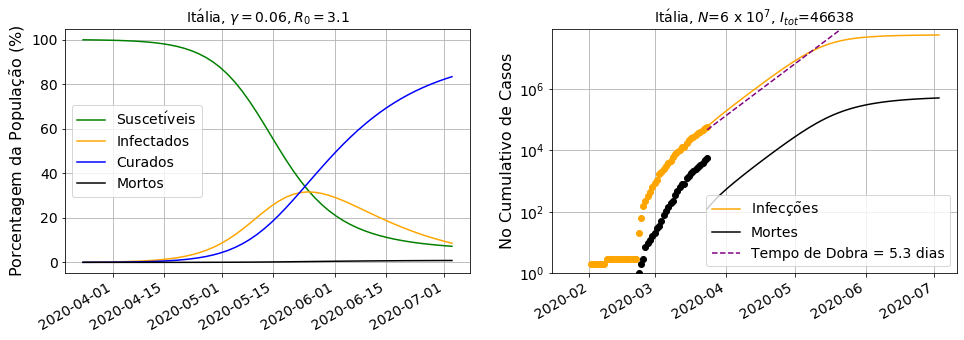

In [10]:
country = select_country('Italy')
f = plottage(country,RK3(country))

Parameters for: Spain
Basic reproduction number R0 = 4.2
Doubling time = 3.615211139442911  days
Infection rate beta = 0.25
Current cummulative infections= 24421.0
End of simulation at t = 101 days 

Percentage of people who avoided infection, S =  2 %
Percentage of infected, I =  3 %
Percentage of removed, R =  95 %

Percentage infected at peak of epidemics:  42 % 

Total number of deaths = 1772


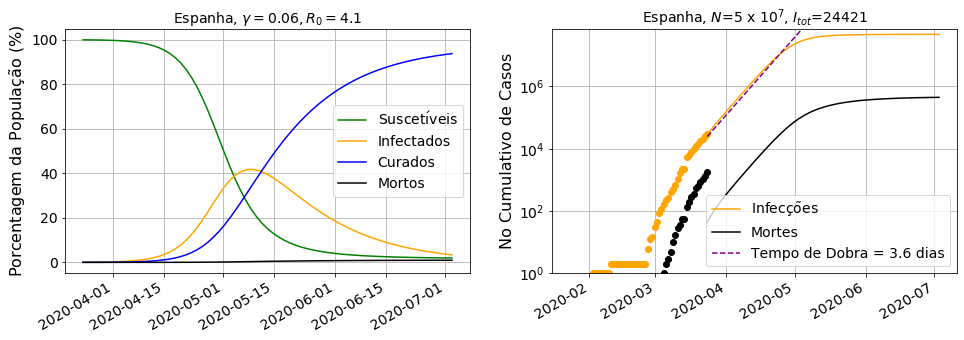

In [11]:
country = select_country('Spain')
f = plottage(country,RK3(country))

Parameters for: Iran
Basic reproduction number R0 = 2.1
Doubling time = 10.528144223511422  days
Infection rate beta = 0.13
Current cummulative infections= 12022.0
End of simulation at t = 542 days 

Percentage of people who avoided infection, S =  18 %
Percentage of infected, I =  0 %
Percentage of removed, R =  82 %

Percentage infected at peak of epidemics:  17 % 

Total number of deaths = 1685


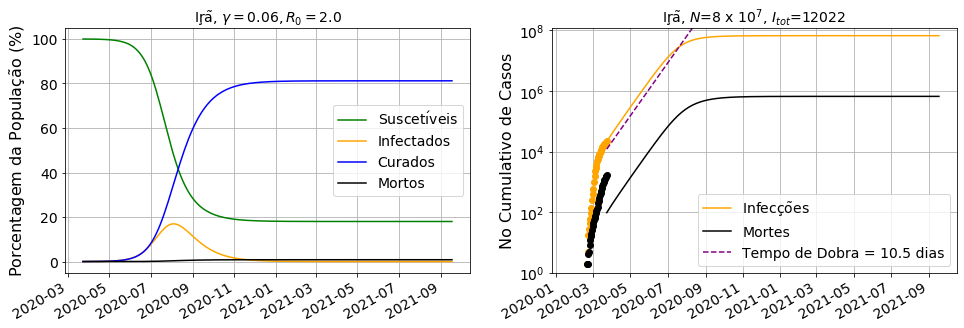

In [12]:
country = select_country('Iran')
f = plottage(country,RK3(country))

Parameters for: China
Basic reproduction number R0 = 1.0
Doubling time = 1091.008559581224  days
Infection rate beta = 0.06
Current cummulative infections= 5770.0
End of simulation at t = 544 days 

Percentage of people who avoided infection, S =  100 %
Percentage of infected, I =  0 %
Percentage of removed, R =  0 %

Percentage infected at peak of epidemics:  0 % 

Total number of deaths = 3265


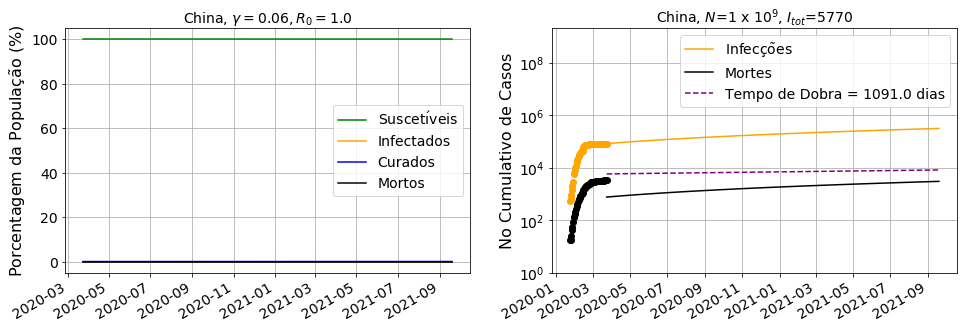

In [13]:
country = select_country('China')
f = plottage(country,RK3(country))

Parameters for: US
Basic reproduction number R0 = 6.3
Doubling time = 2.162568895842668  days
Infection rate beta = 0.38
Current cummulative infections= 32855.0
End of simulation at t = 100 days 

Percentage of people who avoided infection, S =  0 %
Percentage of infected, I =  2 %
Percentage of removed, R =  98 %

Percentage infected at peak of epidemics:  55 % 

Total number of deaths = 417


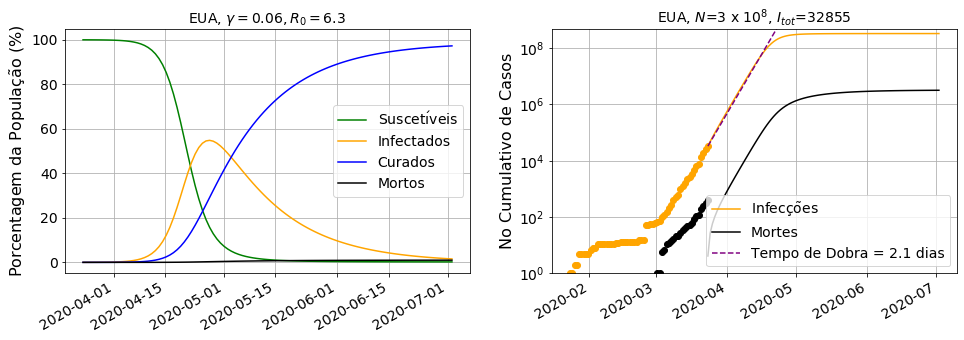

In [14]:
country = select_country('US')
f = plottage(country,RK3(country))

Parameters for: Germany
Basic reproduction number R0 = 4.6
Doubling time = 3.197726456054615  days
Infection rate beta = 0.28
Current cummulative infections= 24513.0
End of simulation at t = 100 days 

Percentage of people who avoided infection, S =  1 %
Percentage of infected, I =  3 %
Percentage of removed, R =  96 %

Percentage infected at peak of epidemics:  45 % 

Total number of deaths = 94


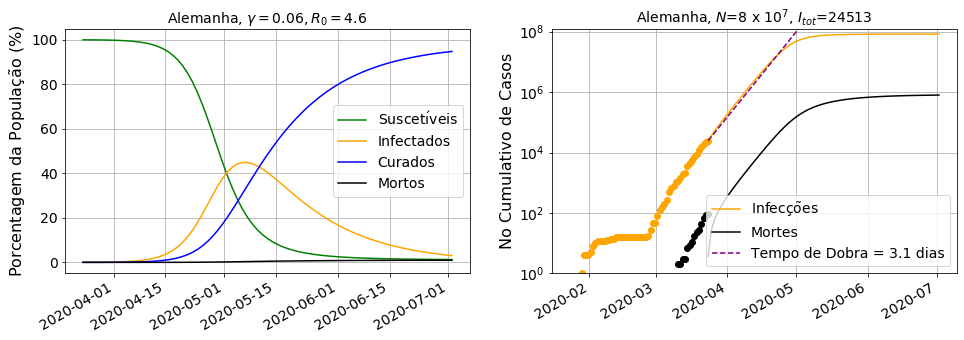

In [15]:
country = select_country('Germany')
f = plottage(country,RK3(country))

Parameters for: Korea, South
Basic reproduction number R0 = 1.2
Doubling time = 56.839032790404815  days
Infection rate beta = 0.07
Current cummulative infections= 5884.0
End of simulation at t = 540 days 

Percentage of people who avoided infection, S =  81 %
Percentage of infected, I =  1 %
Percentage of removed, R =  17 %

Percentage infected at peak of epidemics:  2 % 

Total number of deaths = 104


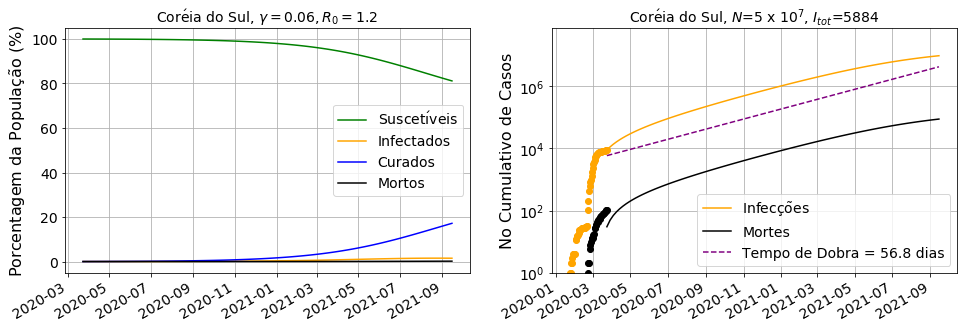

In [16]:
country = select_country('Korea, South')
f = plottage(country,RK3(country))

Parameters for: Brazil
Basic reproduction number R0 = 6.0
Doubling time = 2.312122323828492  days
Infection rate beta = 0.36
Current cummulative infections= 1566.0
End of simulation at t = 100 days 

Percentage of people who avoided infection, S =  0 %
Percentage of infected, I =  3 %
Percentage of removed, R =  97 %

Percentage infected at peak of epidemics:  53 % 

Total number of deaths = 25


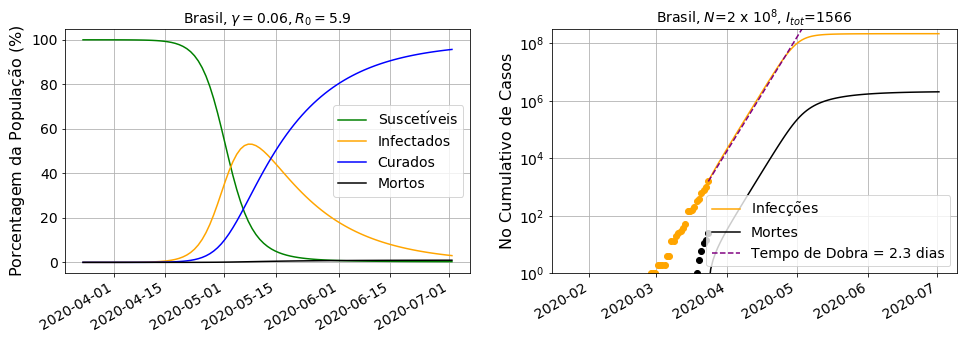

In [18]:
country = select_country('Brazil')
f = plottage(country,RK3(country))